In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import pickle

In [27]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7527c7b6f7bb40ccb0e7a04ec95b972e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JYwIRl2pVUkAkfdmcp8KQwON390nvBMtoyXT6KUZwyOw',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_7527c7b6f7bb40ccb0e7a04ec95b972e.get_object(Bucket='onlineshoppers-donotdelete-pr-iq60uovctkxb0j',Key='online_shoppers_intention.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [29]:
df.shape

(12330, 18)

<AxesSubplot:ylabel='VisitorType'>

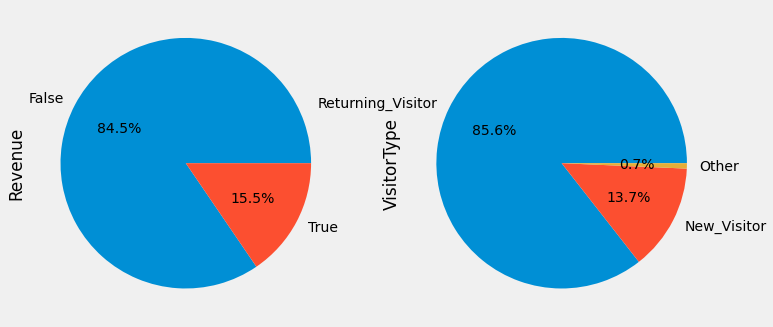

In [30]:
plt.figure(figsize=(11,11))
plt.subplot(121)
df['Revenue'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.subplot(122)
df['VisitorType'].value_counts().plot(kind='pie',autopct='%.1f%%')

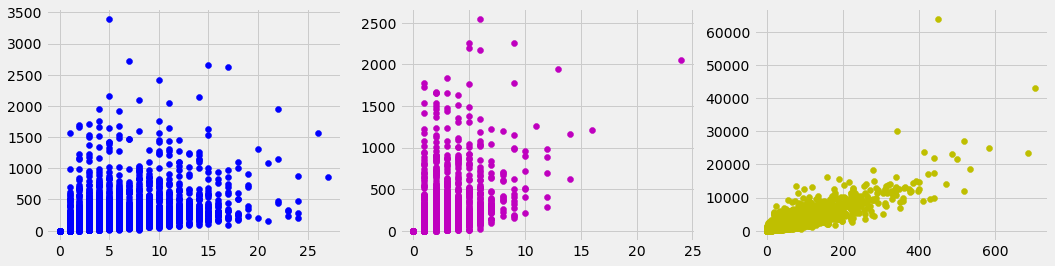

In [31]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.scatter(df['Administrative'],df['Administrative_Duration'],color='b')
plt.subplot(132)
plt.scatter(df['Informational'],df['Informational_Duration'],color='m')
plt.subplot(133)
plt.scatter(df['ProductRelated'],df['ProductRelated_Duration'],color='y')

In [32]:
pd.crosstab(df['Revenue'],df['SpecialDay'])

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Revenue,,,,,,
False,9248,164,230,322,314,144
True,1831,14,13,29,11,10


In [33]:
pd.crosstab([df['Month'],df['VisitorType']],df['Revenue'])

Revenue                  False  True
Month VisitorType                   
Aug   New_Visitor           51    21
      Returning_Visitor    306    55
Dec   New_Visitor          260    75
      Other                 49    13
      Returning_Visitor   1202   128
Feb   New_Visitor            1     0
      Returning_Visitor    180     3
Jul   New_Visitor           43    11
      Returning_Visitor    323    55
June  New_Visitor           23     7
      Other                  1     0
      Returning_Visitor    235    22
Mar   New_Visitor          196    36
      Returning_Visitor   1519   156
May   New_Visitor          231    88
      Returning_Visitor   2768   277
Nov   New_Visitor          291   128
      Other                 19     3
      Returning_Visitor   1928   629
Oct   New_Visitor           96    28
      Returning_Visitor    338    87
Sep   New_Visitor           80    28
      Returning_Visitor    282    58

In [34]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [35]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [36]:
le=LabelEncoder()
df['Month']=le.fit_transform(df['Month'])
df['VisitorType']=le.fit_transform(df['VisitorType'])
df['Weekend']=le.fit_transform(df['Weekend'])
df['Revenue']=le.fit_transform(df['Revenue'])

In [37]:
dfKMeans = df.drop('Revenue',axis=1)

In [38]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

dfKmeans = pd.DataFrame(scaled_df,columns=df.columns)
dfKmeans.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.000000,0.000000,0.000,0.000000,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.222222,0.142857,0.083333,0.000,0.052632,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.428571,0.000000,1.000,0.105263,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.222222,0.285714,0.083333,0.125,0.157895,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.222222,0.285714,0.166667,0.000,0.157895,1.0,1.0,0.0


In [39]:
n_cluster = range(1,10,1)
sse = []
for i in n_cluster:
    k = KMeans(n_clusters=i)
    ypred = k.fit(scaled_df)
    sse.append(k.inertia_)

In [40]:
sse

[10590.3769758261,
 8379.377292572224,
 7050.016902744033,
 6103.314768844925,
 5227.838462882515,
 4776.215532781545,
 4438.427767782375,
 4149.321488858366,
 3975.611137432318]

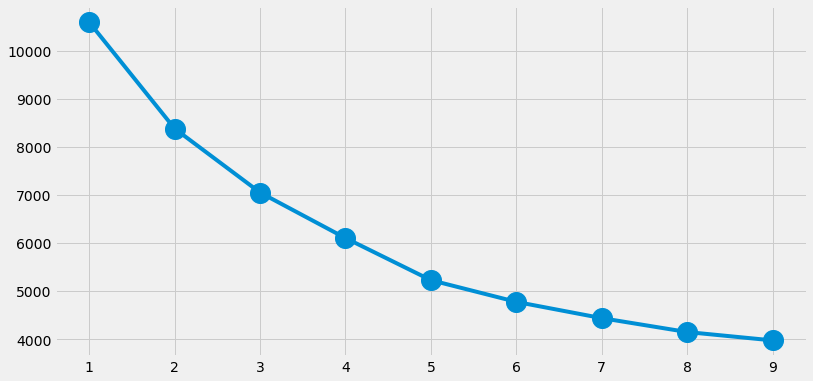

In [41]:
plt.figure(figsize=(12,6))
plt.plot(n_cluster,sse,marker='.',markersize=40)

In [42]:
km = KMeans(n_clusters=4)
ypred = km.fit_predict(dfKmeans)

In [43]:
pca = PCA(n_components=2)
dfPCA = pca.fit_transform(dfKmeans)
dfPCA

array([[-0.59320775, -0.63861394],
       [-0.33301479, -0.14364103],
       [-0.59138515, -0.62820589],
       ...,
       [ 0.53046371, -0.66968139],
       [-0.23283682,  0.02103268],
       [ 0.84340605, -0.07412231]])

In [44]:
dfPCA = pd.DataFrame(dfPCA,columns=['PCA 1','PCA 2'])
dfPCA.head()

,PCA 1,PCA 2
0,-0.593208,-0.638614
1,-0.333015,-0.143641
2,-0.591385,-0.628206
3,-0.413966,-0.295598
4,0.599134,-0.513227


In [45]:
dfPCA['cluster']=ypred

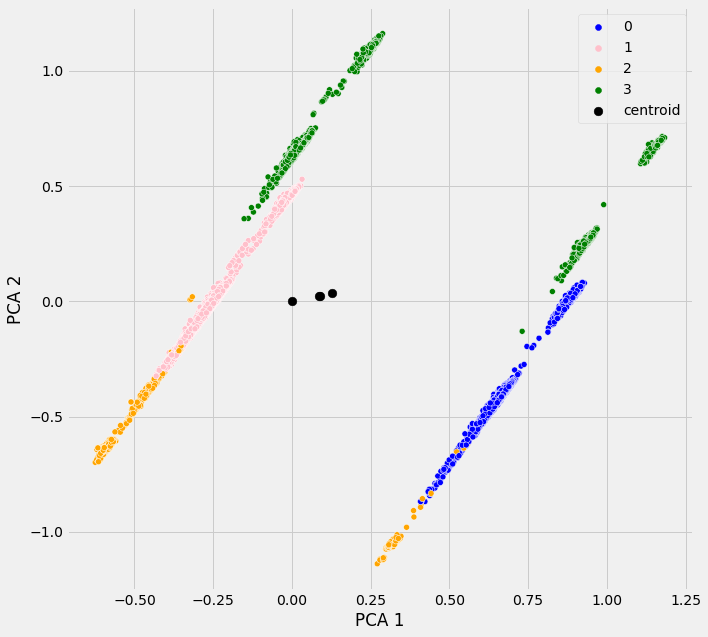

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(dfPCA['PCA 1'], dfPCA['PCA 2'],hue = dfPCA['cluster'],palette=['blue','pink','orange','green'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',s=300,marker='.',label='centroid')
plt.legend()

In [47]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [48]:

x = df.drop('Revenue',axis=1)
y = df['Revenue']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [49]:
def logisticReg(x_train, x_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    ypred = lr.predict(x_test)
    print('***LogisticRegression***')
    print('confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('classification report')
    print(classification_report(y_test,ypred))

In [50]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    ypred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [51]:
def compareModel(x_train, x_test, y_train, y_test):
    logisticReg(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)

In [52]:
compareModel(x_train, x_test, y_train, y_test)

***LogisticRegression***
confusion matrix
[[3033   82]
 [ 370  214]]
classification report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3115
           1       0.72      0.37      0.49       584

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.86      0.88      0.86      3699

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
confusion matrix
[[3012  103]
 [ 259  325]]
Classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3115
           1       0.76      0.56      0.64       584

    accuracy                           0.90      3699
   macro avg       0.84      0.76      0.79      3699
weighted avg       0.90      0.90      0.90      3699



In [53]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)

In [54]:
cv = cross_val_score(rf,x,y,cv=5)
np.mean(cv)

0.8966747769667478

In [57]:
st=StandardScaler()
xtrain_scaled=st.fit_transform(x_train)
xtest_scaled=st.transform(x_test)

In [58]:
xtrain_scaled[0]

array([ 2.3083308 ,  1.30133652,  5.02284934,  2.03773808,  5.54064446,
        5.86150635, -0.44520599, -0.74327962, -0.26001718, -0.31330949,
       -0.07251755, -0.13196854,  0.96960732, -0.06830319,  0.97941275,
       -2.49879627, -0.55240973])

In [59]:
!pip install ibm_watson_machine_learning

In [60]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey":"nWEty7HWO0KRStqNBXUfaXRE675bzBWvvS-1PgtI8aLr"
                }
client=APIClient(wml_credentials)

In [61]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space["resources"] if item["entity"]["name"]==space_name)["metadata"]["id"])

In [63]:
space_uid=guid_from_space_name(client,"models")
print("Space UID = "+space_uid)

Space UID = f2d78523-19e4-497a-b3fe-d89f7509c9e6


In [64]:
client.set.default_space(space_uid)

'SUCCESS'

In [65]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [66]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [68]:
model_details=client.repository.store_model(model=rf,meta_props={
    client.repository.ModelMetaNames.NAME:"online shoppers",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_id(model_details)

In [69]:
model_id

'baa59733-cb71-4efc-9473-b7d7980f63fa'

In [70]:
xtrain_scaled[0]

array([ 2.3083308 ,  1.30133652,  5.02284934,  2.03773808,  5.54064446,
        5.86150635, -0.44520599, -0.74327962, -0.26001718, -0.31330949,
       -0.07251755, -0.13196854,  0.96960732, -0.06830319,  0.97941275,
       -2.49879627, -0.55240973])

In [73]:
rf.predict([[ 1.26263043, -1.08795294, -0.01036924, -0.67800246,  0.55317963,
       -0.27943874,-0.6780023,1.26263043, -1.08795294, -0.01036924, -0.67800246,  0.55317963,
       -0.27943874,-0.6780023]])

ValueError: X has 14 features, but RandomForestClassifier is expecting 17 features as input.

In [107]:
pickle.dump(rf,open('model.pkl','wb'))